<a href="https://colab.research.google.com/github/DeeeTeeee/SepsisClassificationWithFastAPI/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data.
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [139]:
# # !pip install -q <lib_001> <lib_002> ...
# !pip install pandas-profiling
# !pip install shap

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [140]:
# Data handling
import pandas as pd
import numpy as np
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
import os

# EDA (pandas-profiling, etc. )
from pandas_profiling import ProfileReport
from IPython.display import display

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from scipy.stats import skew

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
import shap
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Other packages
import os, pickle
from joblib import dump
import warnings
warnings.filterwarnings("ignore")

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [141]:
# For CSV, use pandas.read_csv
url_test = 'https://raw.githubusercontent.com/DeeeTeeee/SepsisClassificationWithFastAPI/main/Datasets/Paitients_Files_Test.csv'
test_df = pd.read_csv(url_test)
#df = pd.read_csv(url)
url_train = 'https://raw.githubusercontent.com/DeeeTeeee/SepsisClassificationWithFastAPI/main/Datasets/Paitients_Files_Train.csv'

train_df = pd.read_csv(url_train)
print(test_df.head(5))
print(train_df.head(5))

          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0
          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive


In [142]:
test_df.drop('ID',axis=1,inplace=True)

# Data Understanding
The column names cant be easily understood, so I will change the `column names`

In [143]:
# Define a dictionary with the new column names
new_column_names = {
    'PRG': 'Plasma glucose',
    'PL': 'Blood Work Result-1',
    'PR': 'Blood Pressure',
    'SK': 'Blood Work Result-2',
    'TS': 'Blood Work Result-3',
    'M11': 'Body mass index',
    'BD2': 'Blood Work Result-4'
}

# Rename the columns in train_df and test_df using the dictionary
train_df.rename(columns=new_column_names, inplace=True)
test_df.rename(columns=new_column_names, inplace=True)

In [144]:
#Look at the columns in the dataset and their data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   599 non-null    object 
 1   Plasma glucose       599 non-null    int64  
 2   Blood Work Result-1  599 non-null    int64  
 3   Blood Pressure       599 non-null    int64  
 4   Blood Work Result-2  599 non-null    int64  
 5   Blood Work Result-3  599 non-null    int64  
 6   Body mass index      599 non-null    float64
 7   Blood Work Result-4  599 non-null    float64
 8   Age                  599 non-null    int64  
 9   Insurance            599 non-null    int64  
 10  Sepssis              599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [145]:
data = train_df.copy()

## Hypothesis:
**Older patients are more likely to develop sepsis compared to younger patients.**

* Null Hypothesis: The likelihood of developing sepsis is the same for both older and younger patients.

* Alternative Hypothesis: Older patients have a higher likelihood of developing sepsis compared to younger patients.



# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [146]:
#Explore the summary statistics of numerical columns:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood Work Result-1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood Work Result-2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood Work Result-3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
Body mass index,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood Work Result-4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


Plasma glucose
* Count: 599
* Mean: 3.82
*Standard Deviation: 3.36
*Range: 0 to 17

Blood Work Result-1
* Count: 599
* Mean: 120.15
*Standard Deviation: 32.68
*Range: 0 to 198

Blood Pressure
* Count: 599
*Mean: 68.73
*Standard Deviation: 19.34
*Range: 0 to 122

Blood Work Result-2
* Count: 599
*Mean: 20.56
*Standard Deviation: 16.02
*Range: 0 to 99

Blood Work Result-3
* Count: 599
*Mean: 79.46
*Standard Deviation: 116.58
*Range: 0 to 846

Body mass index
* Count: 599
*Mean: 32
*Standard Deviation: 8.01
*Range: 0 to 67.1

Blood Work Result-4
* Count: 599
*Mean: 0.48
*Standard Deviation: 0.34
*Range: 0.078 to 2.42

Age
* Count: 599
*Mean: 33.29
*Standard Deviation: 11.83
*Range: 21 to 81

Insurance
* Count: 599
*Proportion with Insurance: 0.686 (68.6%)

In [147]:
#Explore the summary statistics of numerical columns:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma glucose,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
Blood Work Result-1,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
Blood Pressure,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
Blood Work Result-2,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
Blood Work Result-3,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
Body mass index,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
Blood Work Result-4,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


Plasma glucose
* Count: 169
* Mean: 3.9
*Standard Deviation: 3.4
*Range: 0 to 13

Blood Work Result-1
* Count: 169
* Mean: 124
*Standard Deviation: 29
*Range: 56 to 199

Blood Pressure
* Count: 169
*Mean: 70
*Standard Deviation: 19
*Range: 0 to 114

Blood Work Result-2
* Count: 169
*Mean: 20
*Standard Deviation: 16
*Range: 0 to 49

Blood Work Result-3
* Count: 169
*Mean: 81
*Standard Deviation: 112
*Range: 0 to 540

Body mass index
* Count: 169
*Mean: 32
*Standard Deviation: 7.5
*Range: 0 to 57.3

Blood Work Result-4
* Count: 169
*Mean: 0.4
*Standard Deviation: 0.31
*Range: 0.1 to 1.698

Age
* Count: 169
*Mean: 33
*Standard Deviation: 12
*Range: 21 to 70

Insurance
* Count: 169
*Mean: 0.73
*Standard Deviation: 0.45
*Range: 0 to 1
*Proportion with Insurance: 0.728 (72.8%)

### Lets check for Outliers

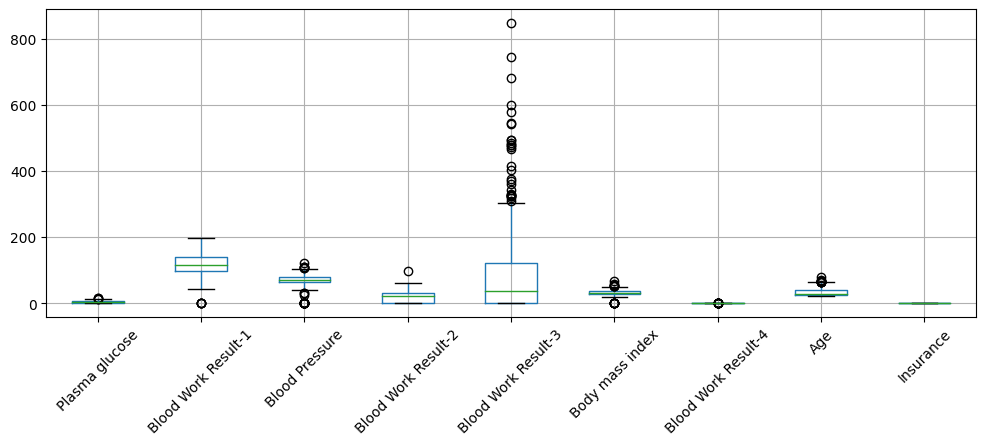

In [148]:
# Check for outliers and slant the column names on the x-axis
fig, ax = plt.subplots(figsize=(12, 4))
train_df.boxplot(ax=ax, rot=45)

# Show the plot
plt.show()

The box plots depicted above reveal the existence of outliers within our dataset. These outliers possess the potential to influence the outcomes of machine learning models, causing them to exhibit reduced accuracy and reliability. Consequently, it becomes imperative to address these outliers through appropriate preprocessing techniques to ensure the robustness and effectiveness of our models.


So I will remove this and replace that with the **median**

In [149]:
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
num_df = train_df[numeric_columns]

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3-Q1
IQR
((num_df< (Q1-1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any()

Plasma glucose          True
Blood Work Result-1     True
Blood Pressure          True
Blood Work Result-2     True
Blood Work Result-3     True
Body mass index         True
Blood Work Result-4     True
Age                     True
Insurance              False
dtype: bool

In [150]:
# Specify the columns of interest
cols_names = ['Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age']

# Check if outliers still exist in the columns
outliers_exist = False

for column in cols_names:
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Modify the values in the column to be within the range
    train_df[column] = train_df[column].clip(lower_bound, upper_bound)

    # Check if outliers exist in the column
    if (train_df[column] < lower_bound).any() or (train_df[column] > upper_bound).any():
        outliers_exist = True
        print(f"Outliers still exist in '{column}'.")

if not outliers_exist:
    print("No outliers exist in the specified columns.")

No outliers exist in the specified columns.


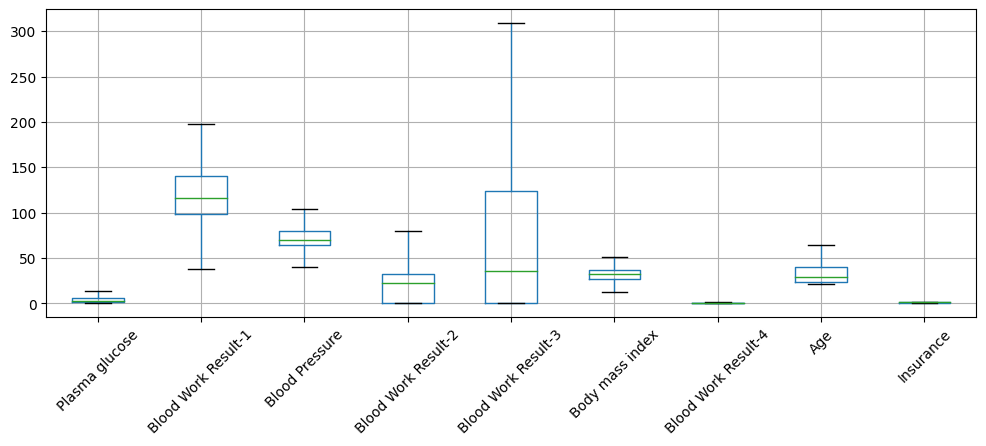

In [151]:
# Check for outliers and slant the column names on the x-axis
fig, ax = plt.subplots(figsize=(12, 4))
train_df.boxplot(ax=ax, rot=45)

# Show the plot
plt.show()

Ok.. outliers gone

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

In [152]:
train_df.columns

Index(['ID', 'Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age', 'Insurance', 'Sepssis'],
      dtype='object')

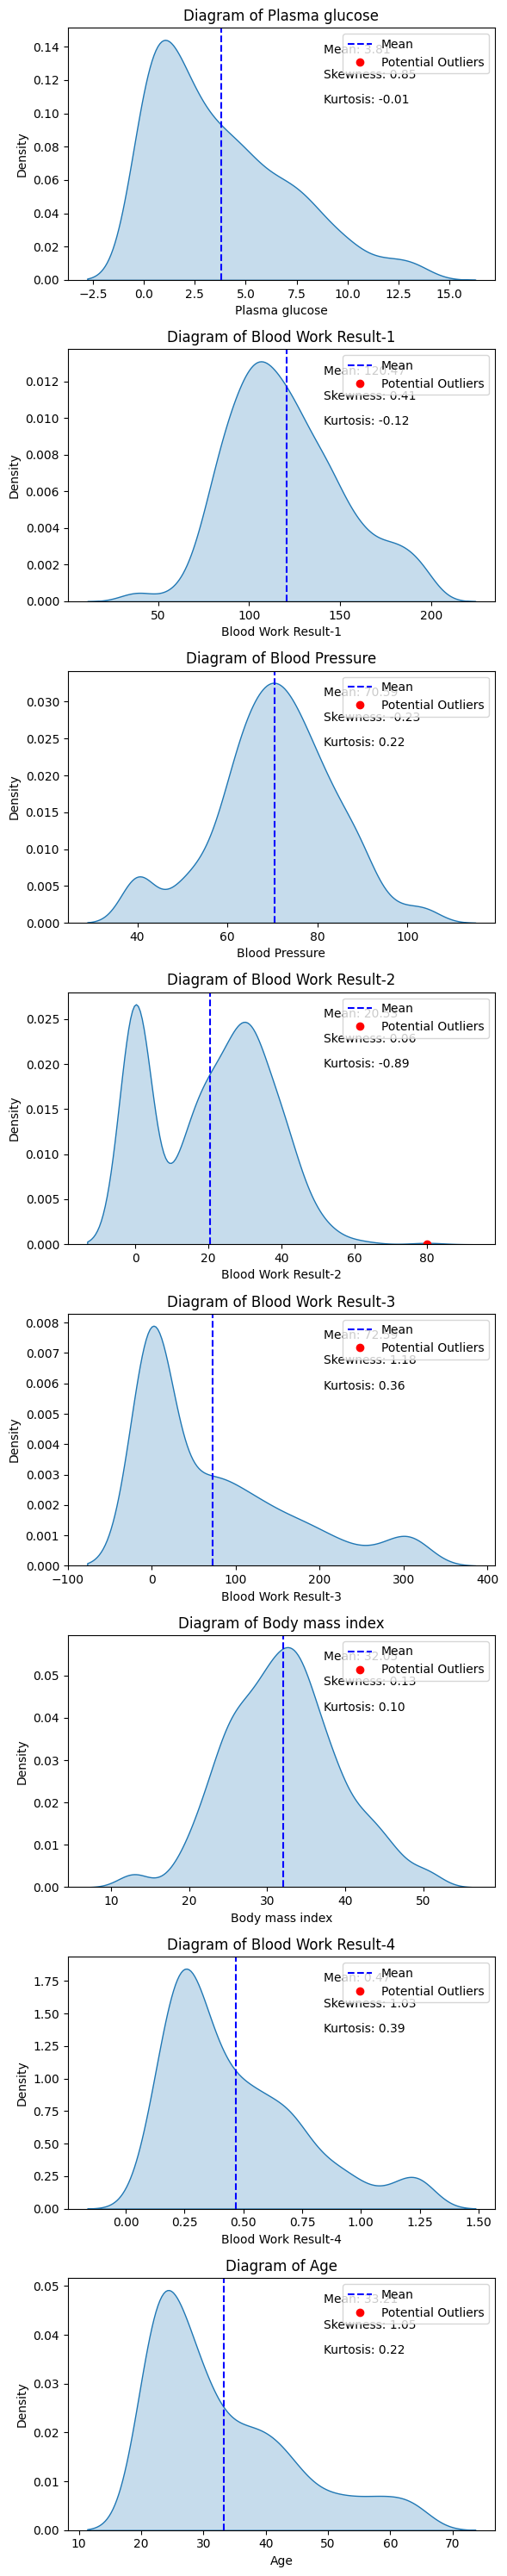

In [153]:
# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(cols_names), figsize=(6, 30))
for i, col in enumerate(cols_names):
    sns.kdeplot(data=train_df, x=col, ax=axes[i], fill=True)
    axes[i].set_title(f'Diagram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # Calculate mean, skewness, and kurtosis
    mean_val = train_df[col].mean()
    skewness_val = train_df[col].skew()
    kurtosis_val = train_df[col].kurtosis()

    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)

    # Add mean line
    axes[i].axvline(mean_val, color='blue', linestyle='--', label='Mean')

    # Add blue dots to indicate potential outliers
    outliers = train_df[(train_df[col] > mean_val + 3 * train_df[col].std()) | (train_df[col] < mean_val - 3 * train_df[col].std())]
    axes[i].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')

    # Add legend
    axes[i].legend()

plt.tight_layout()
plt.show()

Findings:

- The majority of patients attended blood work 1 and 3 appointments.
- Most patients had blood pressure readings between 60 and 80.
- The glucose levels of the majority of patients were less than 5.
- A significant portion of patients were younger than 40 years old.

In [154]:
# Code here

## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

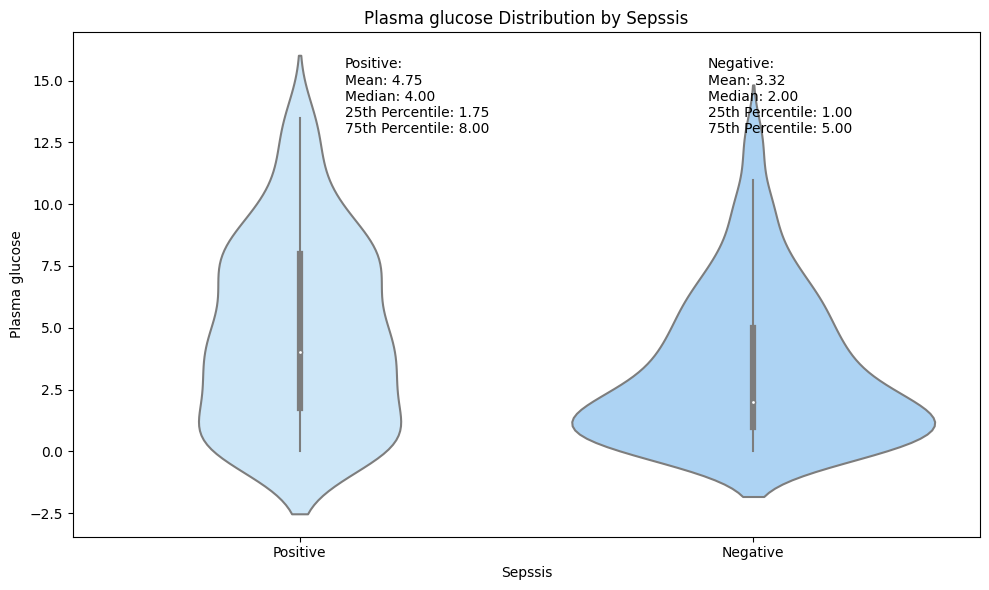

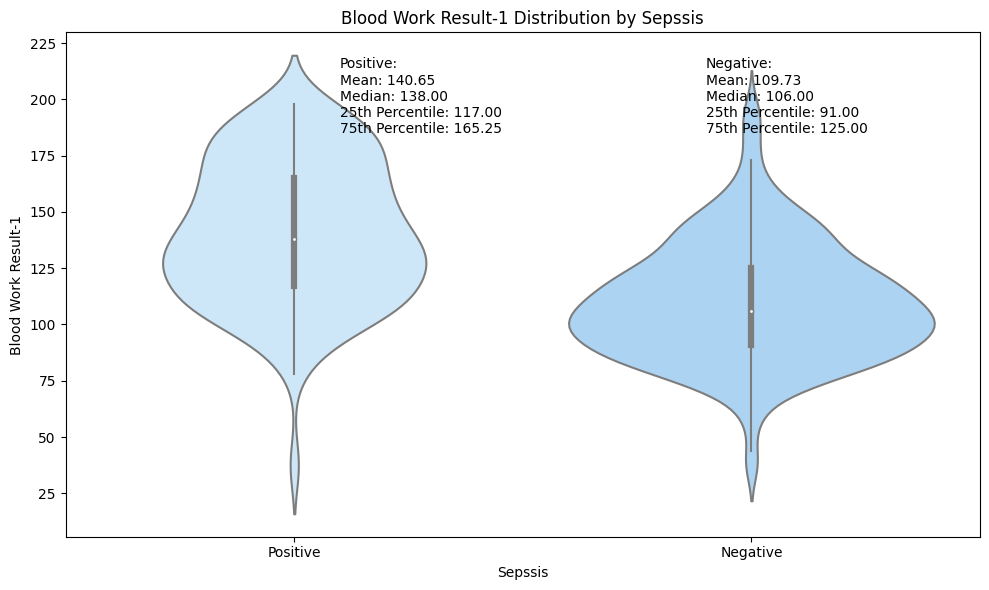

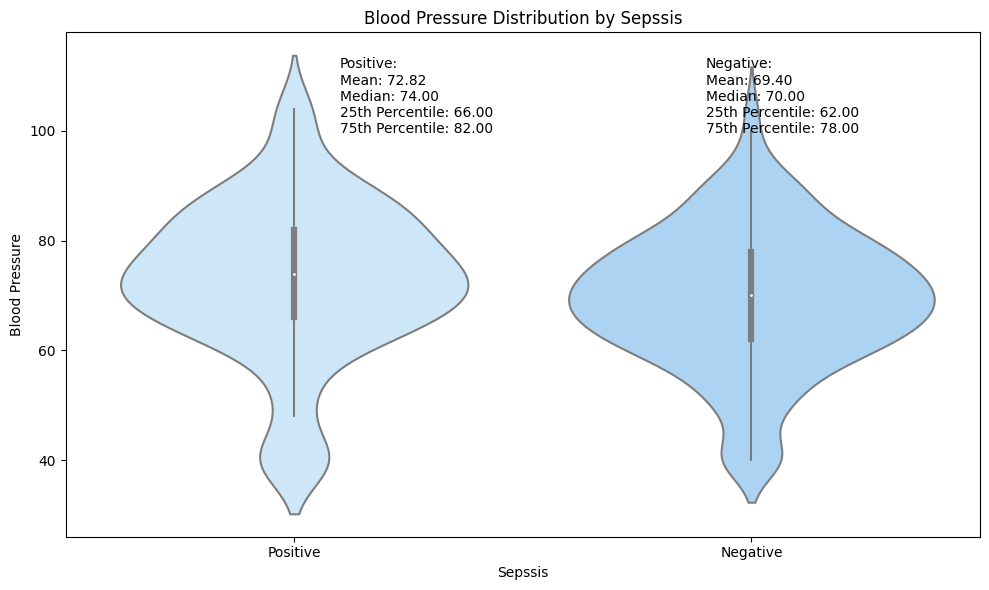

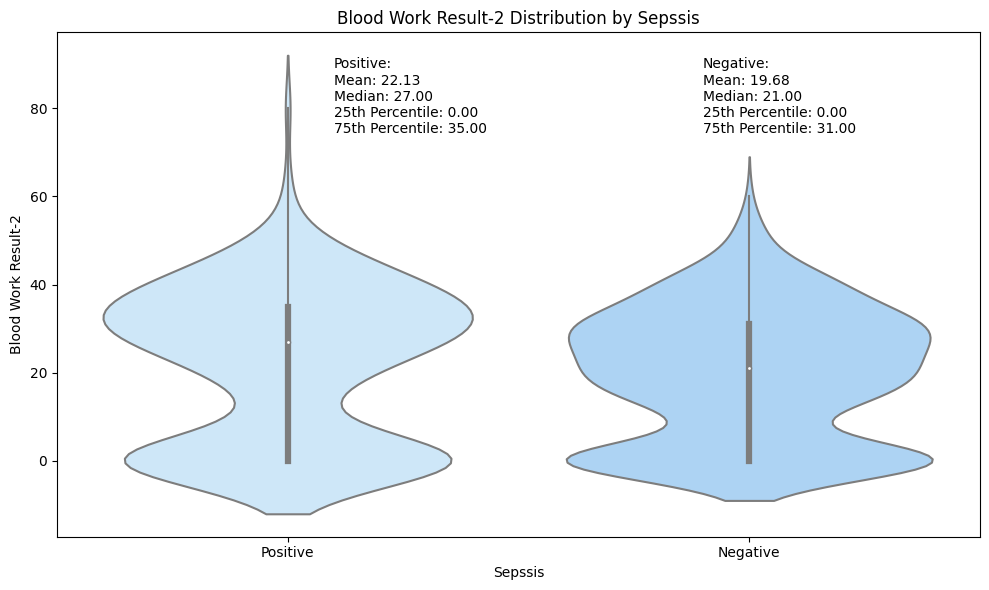

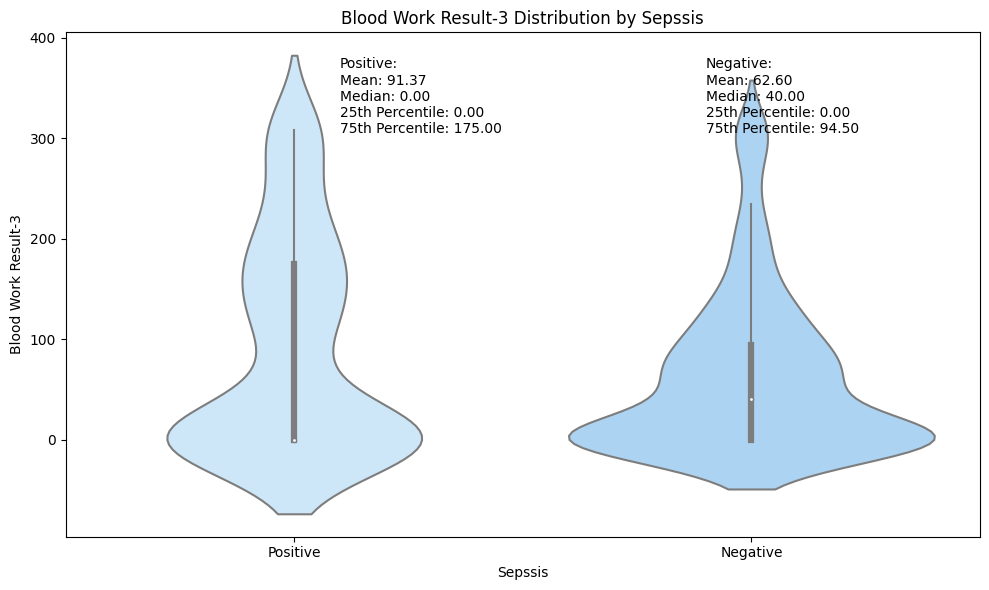

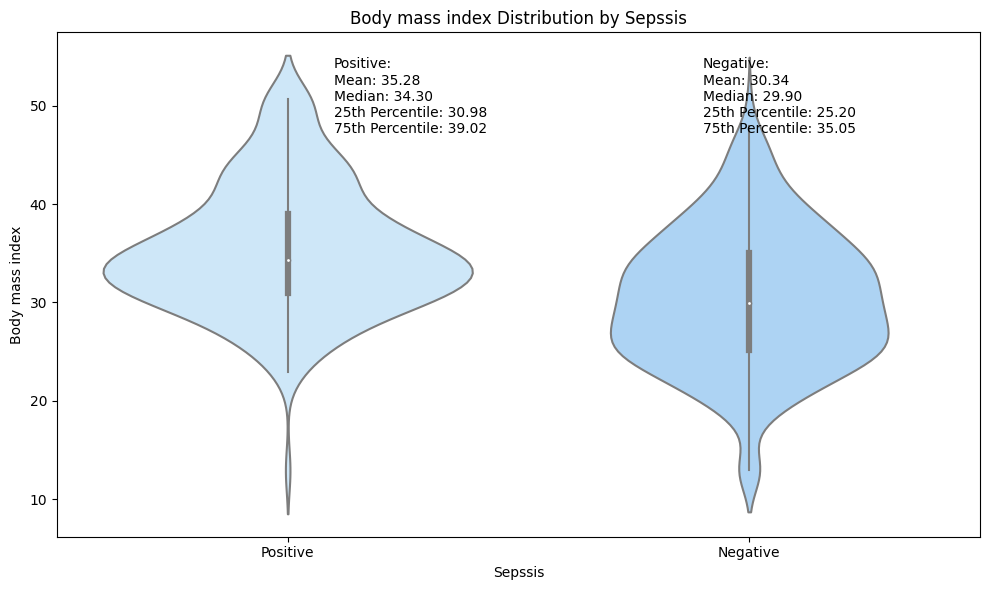

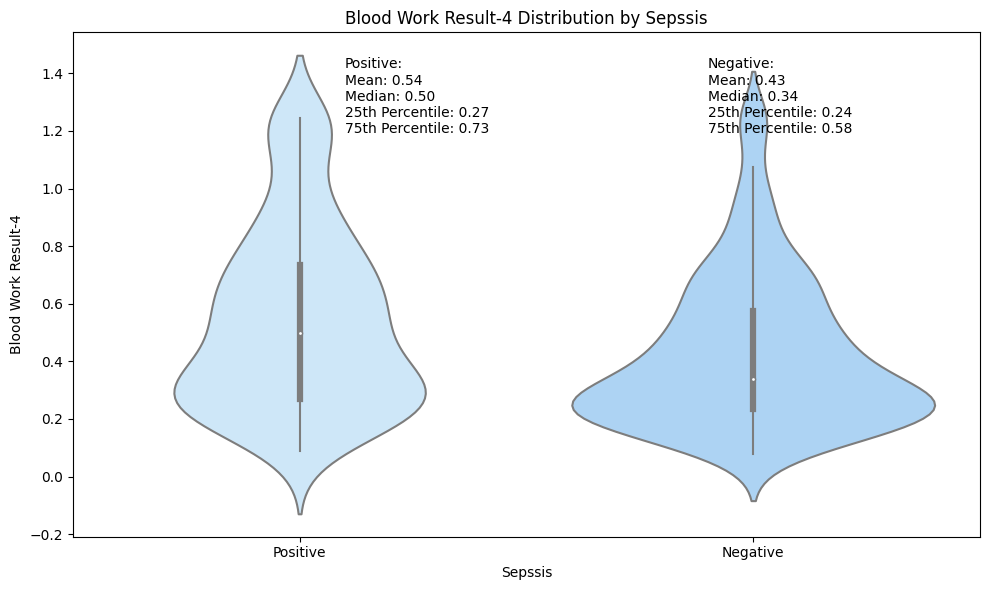

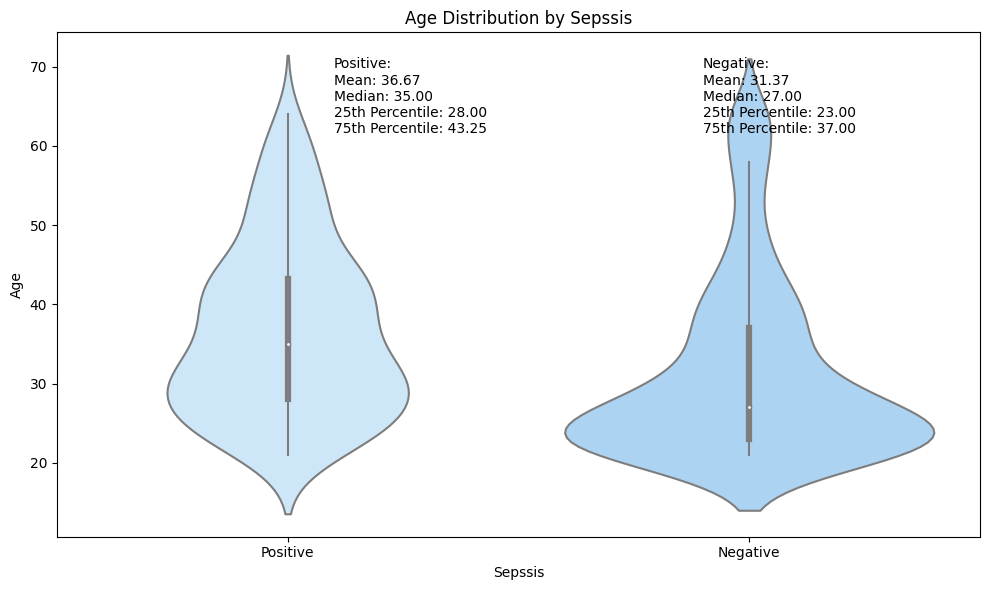

In [155]:

# Define a custom color palette with a blend of blue shades
color_palette = ['#c7e9ff', '#a1d4ff', '#7ac0ff', '#55abff', '#3296ff']

# Numerical Variables - Violin plots with statistics
for var in cols_names:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=train_df, x='Sepssis', y=var, palette=color_palette)
    plt.xlabel('Sepssis')
    plt.ylabel(var)
    plt.title(f'{var} Distribution by Sepssis')

    # Calculate statistics
    positive_vals = train_df[train_df['Sepssis'] == 'Positive'][var]
    negative_vals = train_df[train_df['Sepssis'] == 'Negative'][var]
    stat_dict = {
        'Positive': {
            'Mean': np.mean(positive_vals),
            'Median': np.median(positive_vals),
            '25th Percentile': np.percentile(positive_vals, 25),
            '75th Percentile': np.percentile(positive_vals, 75)
        },
        'Negative': {
            'Mean': np.mean(negative_vals),
            'Median': np.median(negative_vals),
            '25th Percentile': np.percentile(negative_vals, 25),
            '75th Percentile': np.percentile(negative_vals, 75)
        }
    }

    # Add statistics as text annotations
    plt.text(0.30, 0.8, f"Positive:\nMean: {stat_dict['Positive']['Mean']:.2f}\nMedian: {stat_dict['Positive']['Median']:.2f}\n25th Percentile: {stat_dict['Positive']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Positive']['75th Percentile']:.2f}", transform=plt.gca().transAxes, color='black')
    plt.text(0.70, 0.8, f"Negative:\nMean: {stat_dict['Negative']['Mean']:.2f}\nMedian: {stat_dict['Negative']['Median']:.2f}\n25th Percentile: {stat_dict['Negative']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Negative']['75th Percentile']:.2f}", transform=plt.gca().transAxes, color='black')

    plt.tight_layout()
    plt.show()


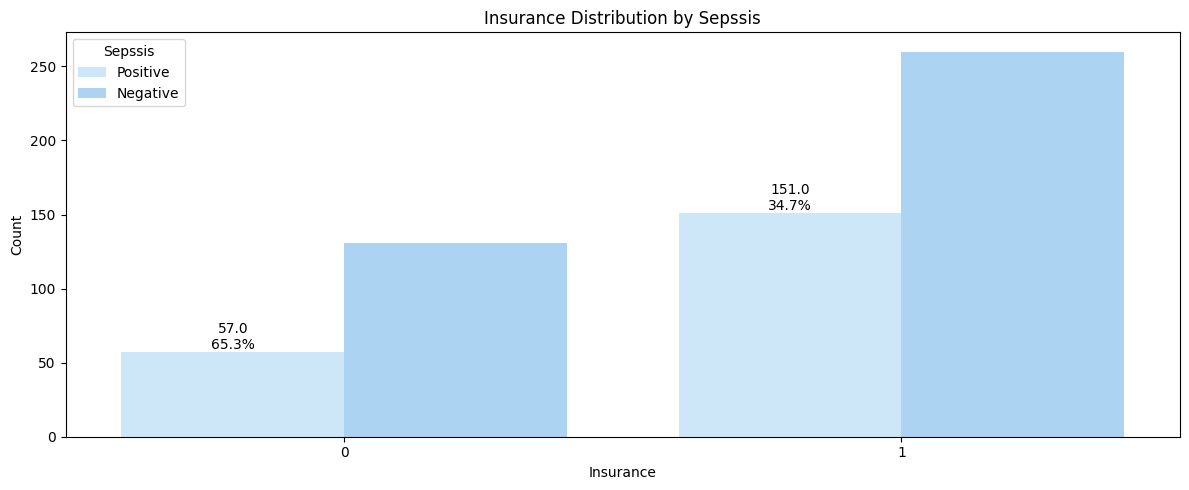

In [156]:
# Categorical Variables - Bar plots
categorical_vars = ['Insurance']
for var in categorical_vars:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=train_df, x=var, hue='Sepssis', palette=color_palette)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'{var} Distribution by Sepssis')

    # Calculate percentage distribution
    total = len(train_df['Sepssis'])
    percentages = train_df['Sepssis'].value_counts(normalize=True) * 100

    # Add data labels and percentage annotations
    for p, percentage in zip(plt.gca().patches, percentages):
        count = p.get_height()
        percentage_label = f'{percentage:.1f}%'
        plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [157]:
# Replace "Positive" with 1 and "Negative" with 0
train_df['Sepssis'] = train_df['Sepssis'].replace({'Positive': 1, 'Negative': 0})

# Calculate correlation coefficients
num_cols = cols_names + ['Insurance'] # Combine the two lists into a single list
correlations = train_df[num_cols + ['Sepssis']].corr()

# Print correlation coefficients
for var in num_cols:
    correlation = correlations.loc[var, 'Sepssis']
    print(f"Pearson correlation between 'Sepssis' and '{var}': {correlation:.2f}")
# Print the updated DataFrame
train_df.head(5)

Pearson correlation between 'Sepssis' and 'Plasma glucose': 0.21
Pearson correlation between 'Sepssis' and 'Blood Work Result-1': 0.46
Pearson correlation between 'Sepssis' and 'Blood Pressure': 0.12
Pearson correlation between 'Sepssis' and 'Blood Work Result-2': 0.07
Pearson correlation between 'Sepssis' and 'Blood Work Result-3': 0.15
Pearson correlation between 'Sepssis' and 'Body mass index': 0.33
Pearson correlation between 'Sepssis' and 'Blood Work Result-4': 0.19
Pearson correlation between 'Sepssis' and 'Age': 0.22
Pearson correlation between 'Sepssis' and 'Insurance': 0.06


,ID,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance,Sepssis
0,ICU200010,6.0,148.0,72,35,0.0,33.6,0.6270,50,0,1
1,ICU200011,1.0,85.0,66,29,0.0,26.6,0.3510,31,0,0
2,ICU200012,8.0,183.0,64,0,0.0,23.3,0.6720,32,1,1
3,ICU200013,1.0,89.0,66,23,94.0,28.1,0.1670,21,1,0
4,ICU200014,0.0,137.0,40,35,168.0,43.1,1.2455,33,1,1


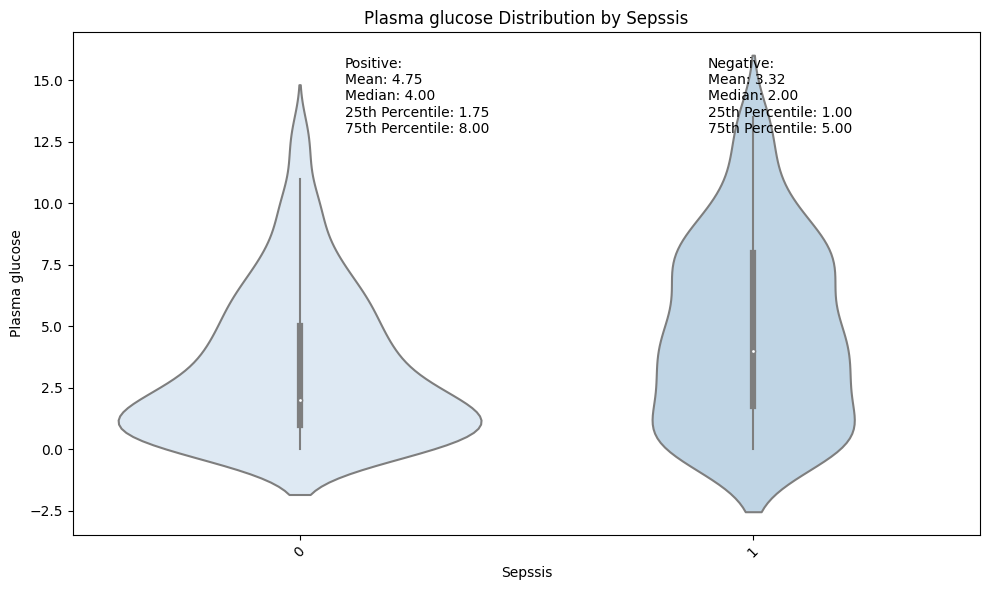

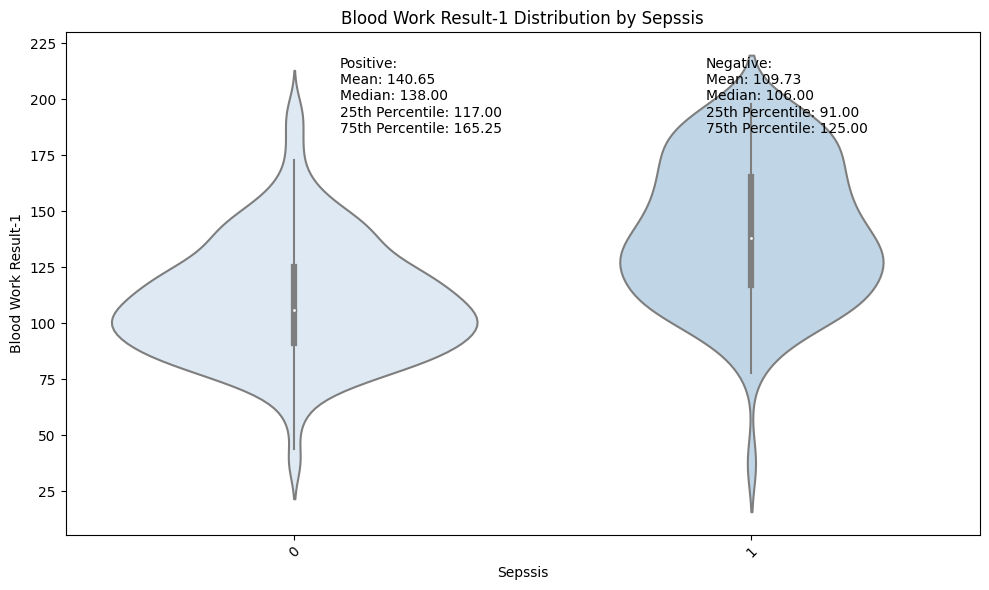

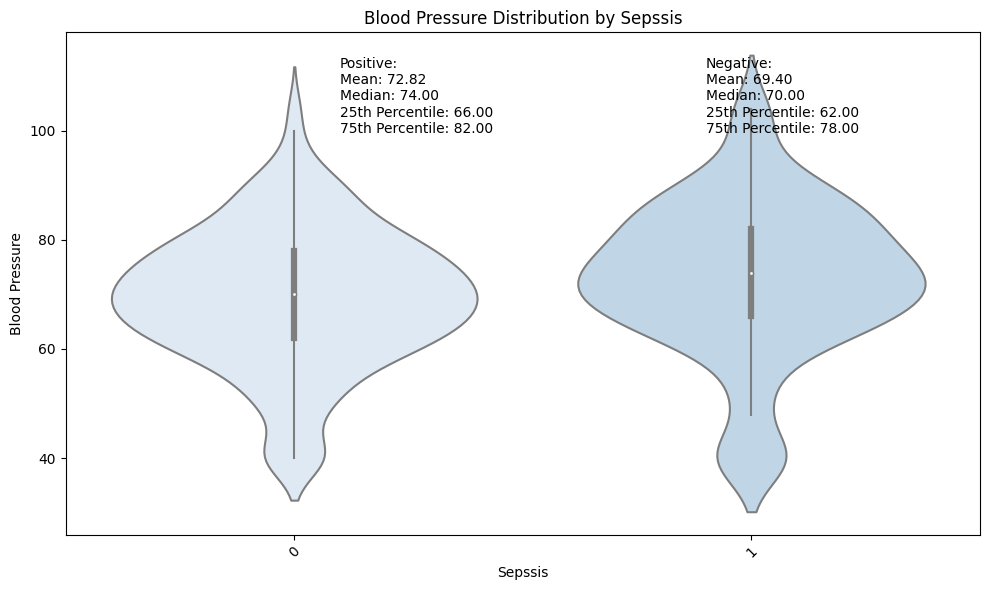

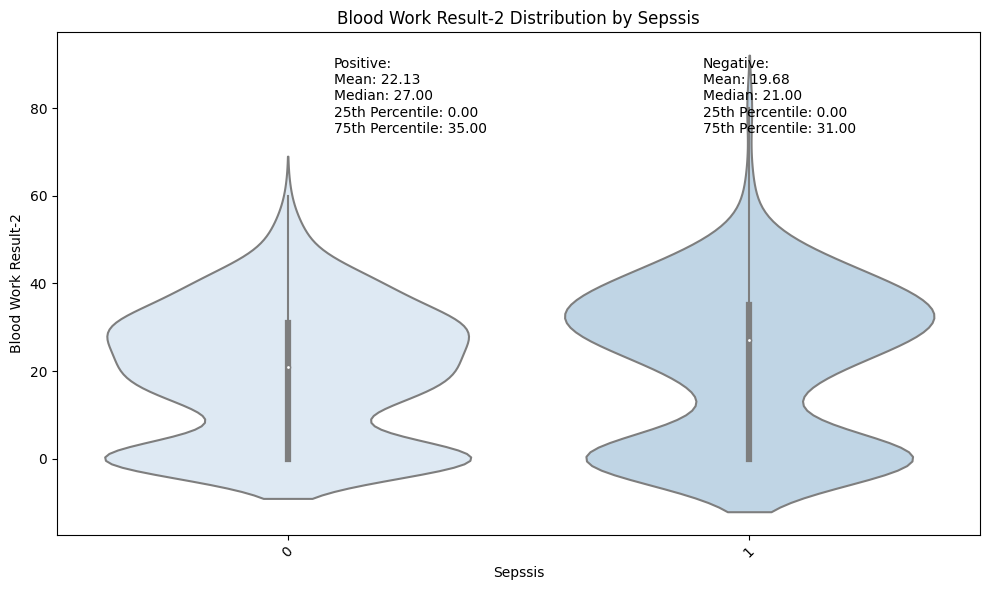

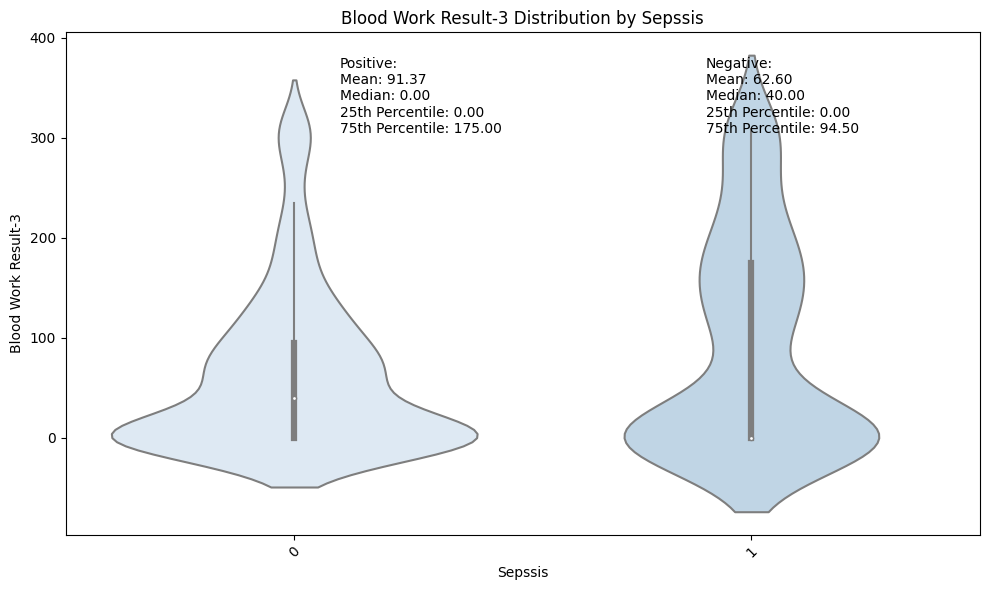

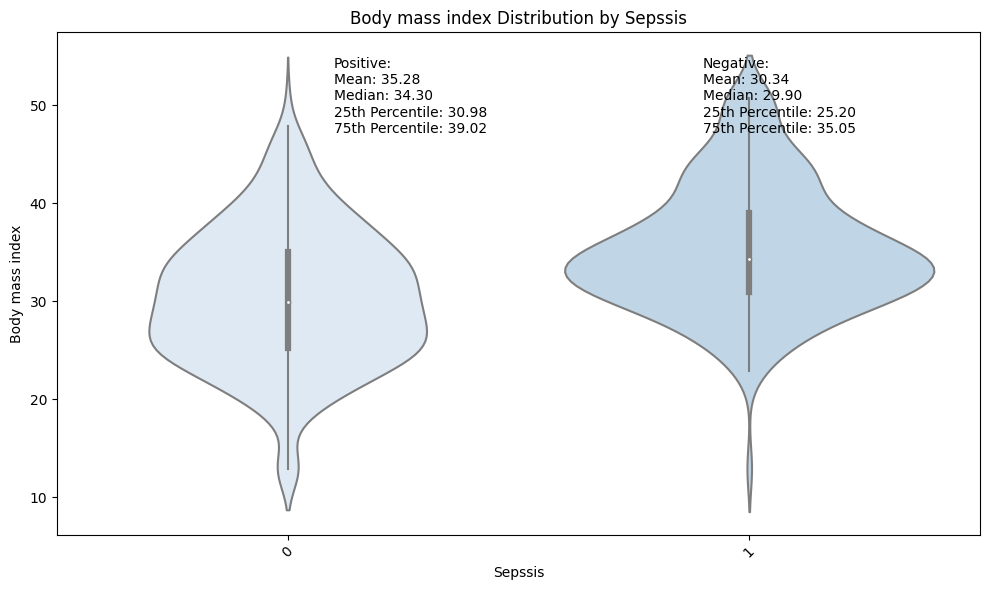

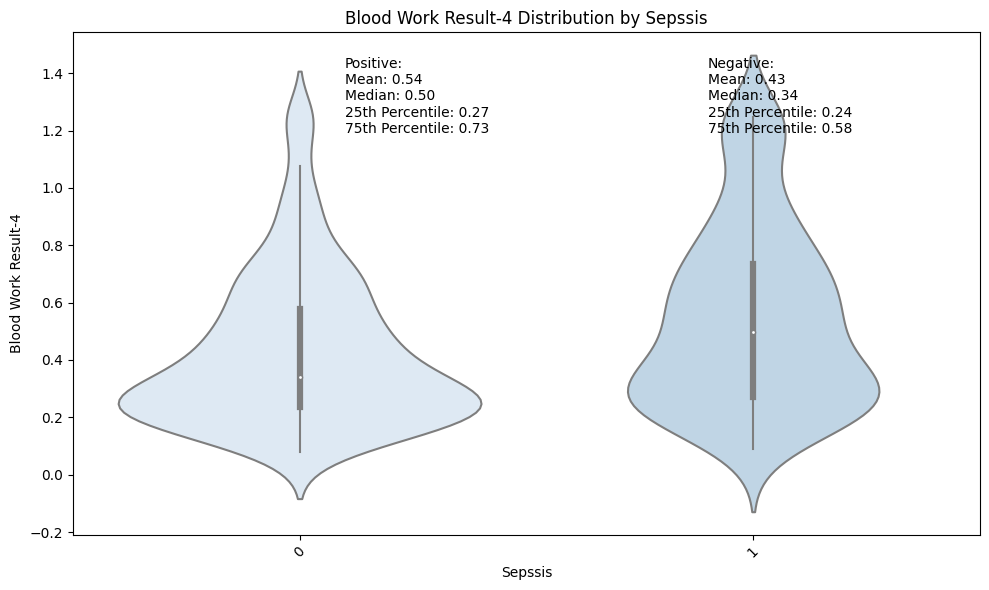

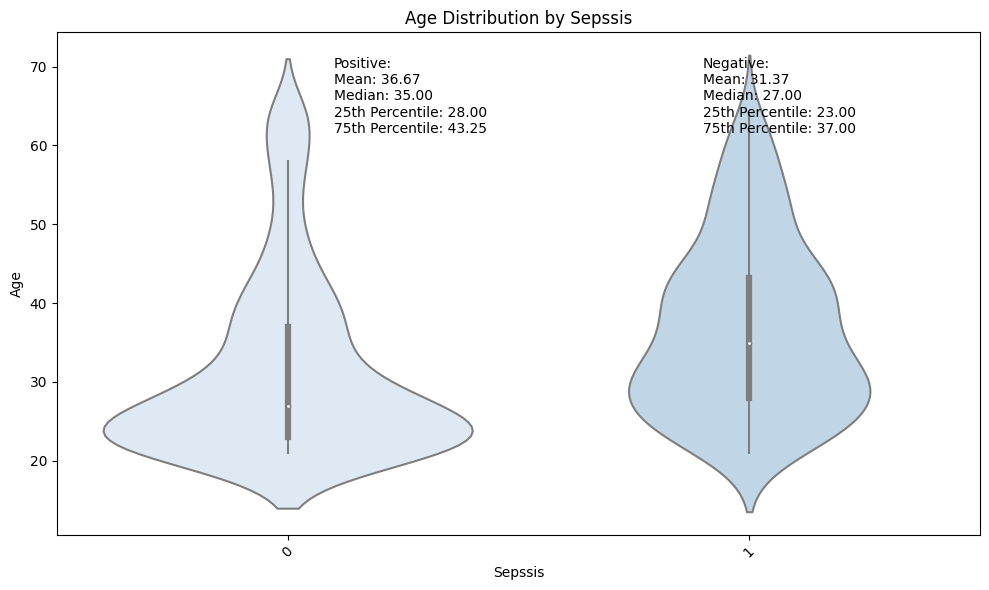

In [158]:

# Color gradient using a blue colormap
blue_palette = sns.color_palette("Blues")

# Numerical Variables - Violin plots with statistics
for var in cols_names:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=train_df, x='Sepssis', y=var, palette=blue_palette)  # Use the blue palette
    plt.xlabel('Sepssis')
    plt.ylabel(var)
    plt.title(f'{var} Distribution by Sepssis')
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

    # Calculate statistics
    positive_vals = train_df[train_df['Sepssis'] == 1][var]
    negative_vals = train_df[train_df['Sepssis'] == 0][var]
    stat_dict = {
        'Positive': {
            'Mean': np.mean(positive_vals),
            'Median': np.median(positive_vals),
            '25th Percentile': np.percentile(positive_vals, 25),
            '75th Percentile': np.percentile(positive_vals, 75)
        },
        'Negative': {
            'Mean': np.mean(negative_vals),
            'Median': np.median(negative_vals),
            '25th Percentile': np.percentile(negative_vals, 25),
            '75th Percentile': np.percentile(negative_vals, 75)
        }
    }

    # Add statistics as text annotations
    plt.text(0.30, 0.8, f"Positive:\nMean: {stat_dict['Positive']['Mean']:.2f}\nMedian: {stat_dict['Positive']['Median']:.2f}\n25th Percentile: {stat_dict['Positive']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Positive']['75th Percentile']:.2f}", transform=plt.gca().transAxes)
    plt.text(0.70, 0.8, f"Negative:\nMean: {stat_dict['Negative']['Mean']:.2f}\nMedian: {stat_dict['Negative']['Median']:.2f}\n25th Percentile: {stat_dict['Negative']['25th Percentile']:.2f}\n75th Percentile: {stat_dict['Negative']['75th Percentile']:.2f}", transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()


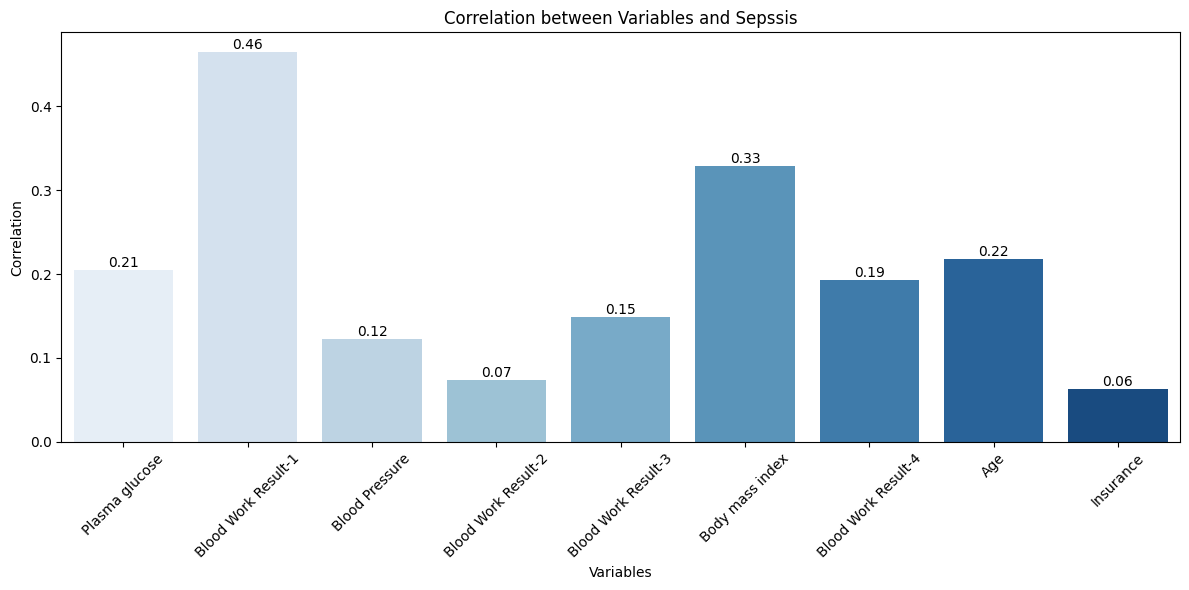

In [159]:


# Get correlation values
correlation_values = correlations.loc[num_cols, 'Sepssis']

# Create bar plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility
ax = sns.barplot(x=num_cols, y=correlation_values, palette='Blues')  # Use the 'Blues' color palette

# Add data labels to the bar plot
for i, val in enumerate(correlation_values):
    ax.text(i, val, round(val, 2), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation between Variables and Sepssis')

# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust plot layout to avoid overlapping labels
plt.show()


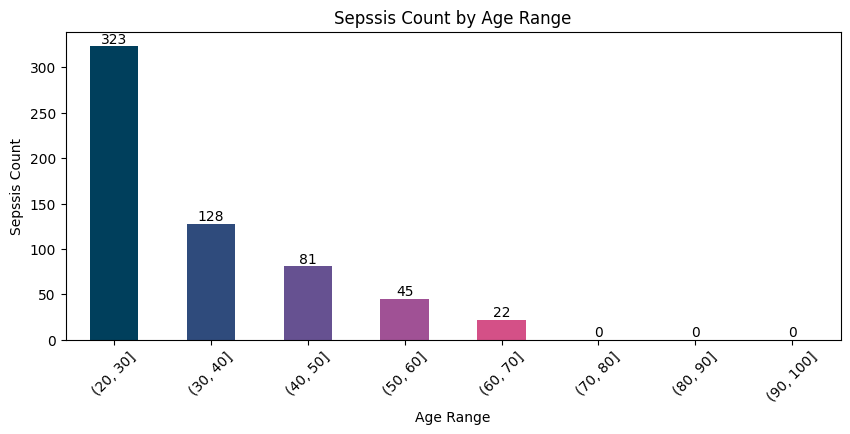

In [160]:

age_ranges = pd.cut(train_df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100])
grouped_data = train_df.groupby(age_ranges)

# Calculate the count of 'Sepssis' for each age range
count_sepsis_by_age = grouped_data['Sepssis'].count()

# Define a custom color palette with shades of blue
colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']

# Plotting the count of 'Sepssis' for each age range
ax = count_sepsis_by_age.plot(kind='bar', xlabel='Age Range', ylabel='Sepssis Count', figsize =(10,4), title='Sepssis Count by Age Range', color=colors)
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [161]:
# Check for duplicate rows in train_df
train_duplicate_rows = train_df.duplicated()
print("Number of duplicate rows in train_df:", train_duplicate_rows.sum())

# Check for duplicate rows in test_df
test_duplicate_rows = test_df.duplicated()
print("Number of duplicate rows in test_df:", test_duplicate_rows.sum())

Number of duplicate rows in train_df: 0
Number of duplicate rows in test_df: 0


## Impute Missing Values

In [162]:
# Use pandas.DataFrame.drop_duplicates method
missing_traindf = train_df.isna().sum()
missing_testdf = test_df.isna().sum()
print(missing_traindf, missing_testdf)

ID                     0
Plasma glucose         0
Blood Work Result-1    0
Blood Pressure         0
Blood Work Result-2    0
Blood Work Result-3    0
Body mass index        0
Blood Work Result-4    0
Age                    0
Insurance              0
Sepssis                0
dtype: int64 Plasma glucose         0
Blood Work Result-1    0
Blood Pressure         0
Blood Work Result-2    0
Blood Work Result-3    0
Body mass index        0
Blood Work Result-4    0
Age                    0
Insurance              0
dtype: int64


In [163]:
train_df.columns

Index(['ID', 'Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age', 'Insurance', 'Sepssis'],
      dtype='object')

## New Features Creation

## Features Encoding




In [164]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.
def encode_target_variable(data, target_variable):
    # Encode the target variable using LabelEncoder
    label_encoder = LabelEncoder()
    encoded_target = label_encoder.fit_transform(data[target_variable])
    target_encoded = pd.DataFrame(encoded_target, columns=[target_variable])

    # Combine the features and the encoded target variable
    data_encoded = pd.concat([data.iloc[:, :-1], target_encoded], axis=1)
    data_encoded.drop('ID', axis=1, inplace=True)

    return data_encoded

In [165]:
# Encode target variable in train data
train_encoded = encode_target_variable(train_df, 'Sepssis')

# Print the encoded train data
print(train_encoded.head())

   Plasma glucose  Blood Work Result-1  Blood Pressure  Blood Work Result-2  \
0             6.0                148.0              72                   35   
1             1.0                 85.0              66                   29   
2             8.0                183.0              64                    0   
3             1.0                 89.0              66                   23   
4             0.0                137.0              40                   35   

   Blood Work Result-3  Body mass index  Blood Work Result-4  Age  Insurance  \
0                  0.0             33.6               0.6270   50          0   
1                  0.0             26.6               0.3510   31          0   
2                  0.0             23.3               0.6720   32          1   
3                 94.0             28.1               0.1670   21          1   
4                168.0             43.1               1.2455   33          1   

   Sepssis  
0        1  
1        0  
2    

## Dataset Splitting

In [166]:
def split_data(X, y, test_size, random_state=42, stratify=None):
    # Split the data into train and validation sets
    X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=stratify)

    return X_train, X_eval, y_train, y_eval

# Split the data into train and validation sets for both X and y
X_train, X_eval, y_train, y_eval = split_data(train_encoded.iloc[:, :-1], train_encoded.iloc[:, -1:], test_size=0.2, random_state=42, stratify=train_encoded.iloc[:, -1:])

# Print the shapes of the train and validation sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_eval shape:", X_eval.shape)
print("y_eval shape:", y_eval.shape)

X_train shape: (479, 9)
y_train shape: (479, 1)
X_eval shape: (120, 9)
y_eval shape: (120, 1)


In [167]:
# Creating imputer variables
num_imputer = SimpleImputer(strategy = "mean")

num_imputer.fit(X_train)

X_train_imputed = num_imputer.transform(X_train)
X_eval_imputed = num_imputer.transform(X_eval)
X_test_imputed = num_imputer.transform(test_df)

## Features Scaling


In [168]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.
scaler = StandardScaler()
scaler.fit(X_train_imputed)

columns = num_cols

def scale_data(data, scaler, columns):
    scaled_data = scaler.transform(data)
    scaled_df = pd.DataFrame(scaled_data, columns=columns)
    return scaled_df

In [169]:
# Scale the data
X_train_df = scale_data(X_train_imputed, scaler, columns)
X_eval_df = scale_data(X_eval_imputed, scaler, columns)
X_test = scale_data(X_test_imputed, scaler, columns)

## Optional: Train set Balancing (for Classification only)

In [170]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001 logistic_regression

Please, keep the following structure to try all the model you want.

In [171]:
def logistic_regression_model(X_train, y_train, X_eval, y_eval, random_state=42):
    # Fit logistic regression model
    lr_model = LogisticRegression(random_state=random_state)
    lr_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    lr_preds = lr_model.predict(X_eval)

    # Calculate F1 score
    lr_f1_score = f1_score(y_eval, lr_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, lr_preds)

    # Calculate AUC score
    lr_auc_score = roc_auc_score(y_eval, lr_preds)

    # Calculate other metrics
    lr_recall = recall_score(y_eval, lr_preds)
    lr_precision = precision_score(y_eval, lr_preds)
    lr_f2_score = fbeta_score(y_eval, lr_preds, beta=2)
    lr_accuracy = accuracy_score(y_eval, lr_preds)

    return lr_model, lr_preds, lr_f1_score, lr_recall, lr_precision, lr_f2_score, lr_accuracy, fpr, tpr, thresholds, lr_auc_score

# Call the function and get the outputs
lr_model, lr_preds, lr_f1_score, lr_recall, lr_precision, lr_f2_score, lr_accuracy, fpr, tpr, thresholds, lr_auc_score = logistic_regression_model(X_train_df, y_train, X_eval_df, y_eval)

print("F1 Score:", lr_f1_score)
print("Recall Score:", lr_recall)
print("Precision Score:", lr_precision)
print("F2 Score:", lr_f2_score)
print("Accuracy Score:", lr_accuracy)
print("ROC AUC Score:", lr_auc_score)


F1 Score: 0.6265060240963854
Recall Score: 0.6190476190476191
Precision Score: 0.6341463414634146
F2 Score: 0.6220095693779905
Accuracy Score: 0.7416666666666667
ROC AUC Score: 0.7133699633699634


In [172]:
import plotly.graph_objects as go

def plot_roc_curve(fpr, tpr, auc_score):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=fpr, y=tpr,
                             mode='lines',
                             name=f'ROC curve (AUC = {auc_score:.2f})'))

    fig.add_shape(
        type='line',
        x0=0,
        y0=0,
        x1=1,
        y1=1,
        line=dict(color='black', dash='dash')
    )

    fig.update_layout(title_text='ROC Curve for Logistic Regression',
                      xaxis_title='False Positive Rate',
                      yaxis_title='True Positive Rate',
                      legend=dict(x=0.8, y=0.1),
                      showlegend=True)

    fig.show()

# Call the function and get the outputs
plot_roc_curve(fpr, tpr, lr_auc_score)


In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def logistic_regression_model(X_train, y_train, X_eval, y_eval, random_state=42):
    # Fit logistic regression model
    lr_model = LogisticRegression(random_state=random_state)
    lr_model.fit(X_train, y_train)

    # Make predictions on the training set and evaluation set
    train_preds = lr_model.predict(X_train)
    eval_preds = lr_model.predict(X_eval)

    # Calculate F1 scores
    train_f1_score = f1_score(y_train, train_preds)
    eval_f1_score = f1_score(y_eval, eval_preds)

    return train_f1_score, eval_f1_score

# Call the function and get the F1 scores
train_f1, eval_f1 = logistic_regression_model(X_train_df, y_train, X_eval_df, y_eval)

print("F1 Score on Training Set:", train_f1)
print("F1 Score on Evaluation Set:", eval_f1)


F1 Score on Training Set: 0.6486486486486487
F1 Score on Evaluation Set: 0.6265060240963854


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Define the logistic regression model
lr_model = LogisticRegression(random_state=42)

# Define the F1 scorer for cross-validation
f1_scorer = make_scorer(f1_score)

# Perform cross-validation and get the scores
cv_scores = cross_val_score(lr_model, X_train_df, y_train, cv=5, scoring=f1_scorer)

# Calculate the average F1 score
avg_f1_score = cv_scores.mean()

print("Cross-Validation Scores:", cv_scores)
print("Average F1 Score:", avg_f1_score)


Cross-Validation Scores: [0.6557377  0.66666667 0.65384615 0.52830189 0.70967742]
Average F1 Score: 0.642845966315629


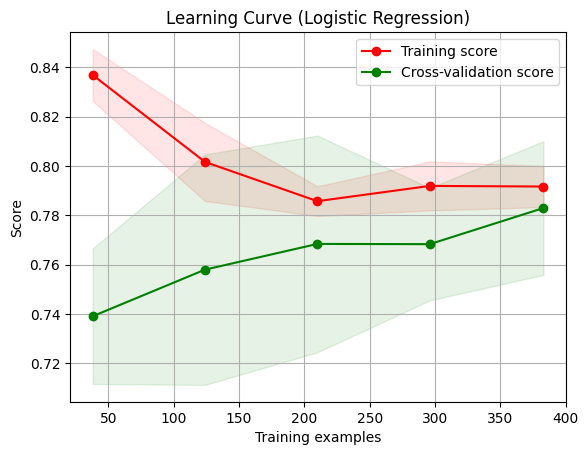

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Call the function to plot the learning curve
plot_learning_curve(lr_model, "Learning Curve (Logistic Regression)", X_train_df, y_train, cv=5, n_jobs=-1)

plt.show()


## Simple Model #002 - Decision trees

In [86]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_model(X_train, y_train, X_eval, y_eval, random_state=42):
    # Fit Decision Tree model
    dt_model = DecisionTreeClassifier(random_state=random_state)
    dt_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    dt_preds = dt_model.predict(X_eval)

    # Calculate F1 score
    dt_f1_score = f1_score(y_eval, dt_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, dt_preds)

    # Calculate AUC score
    dt_auc_score = roc_auc_score(y_eval, dt_preds)

    # Calculate other metrics
    dt_recall = recall_score(y_eval, dt_preds)
    dt_precision = precision_score(y_eval, dt_preds)
    dt_f2_score = fbeta_score(y_eval, dt_preds, beta=2)
    dt_accuracy = accuracy_score(y_eval, dt_preds)

    return dt_model, dt_preds, dt_f1_score, dt_recall, dt_precision, dt_f2_score, dt_accuracy, fpr, tpr, thresholds, dt_auc_score

# Call the function and get the outputs
dt_model, dt_preds, dt_f1_score, dt_recall, dt_precision, dt_f2_score, dt_accuracy, fpr, tpr, thresholds, dt_auc_score = decision_tree_model(X_train_df, y_train, X_eval_df, y_eval)

print("F1 Score:", dt_f1_score)
print("Recall Score:", dt_recall)
print("Precision Score:", dt_precision)
print("F2 Score:", dt_f2_score)
print("Accuracy Score:", dt_accuracy)
print("ROC AUC Score:", dt_auc_score)


F1 Score: 0.6024096385542169
Recall Score: 0.5952380952380952
Precision Score: 0.6097560975609756
F2 Score: 0.5980861244019139
Accuracy Score: 0.725
ROC AUC Score: 0.6950549450549451


In [87]:
import plotly.graph_objects as go

def plot_roc_curve(fpr, tpr, auc_score):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=fpr, y=tpr,
                             mode='lines',
                             name=f'ROC curve (AUC = {auc_score:.2f})'))

    fig.add_shape(
        type='line',
        x0=0,
        y0=0,
        x1=1,
        y1=1,
        line=dict(color='black', dash='dash')
    )

    fig.update_layout(title_text='ROC Curve for Decision Tree',
                      xaxis_title='False Positive Rate',
                      yaxis_title='True Positive Rate',
                      legend=dict(x=0.8, y=0.1),
                      showlegend=True)

    fig.show()

# Plot the ROC curve
plot_roc_curve(fpr, tpr, dt_auc_score)


In [89]:
import numpy as np
import plotly.graph_objects as go

# Lists to store training and validation F1 scores
train_f1_scores = []
val_f1_scores = []

# Range of max_depth values to test
max_depth_values = np.arange(1, 21)

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize and fit the Decision Tree model
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(X_train_df, y_train)

    # Make predictions on training and validation sets
    train_preds = dt_model.predict(X_train_df)
    val_preds = dt_model.predict(X_eval_df)

    # Calculate F1 scores for training and validation sets
    train_f1 = f1_score(y_train, train_preds)
    val_f1 = f1_score(y_eval, val_preds)

    # Append F1 scores to the lists
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

# Create traces for training and validation F1 scores
train_trace = go.Scatter(x=max_depth_values, y=train_f1_scores, mode='lines', name='Training F1 Score')
val_trace = go.Scatter(x=max_depth_values, y=val_f1_scores, mode='lines', name='Validation F1 Score')

# Create layout
layout = go.Layout(title='Checking for Overfitting: Decision Tree',
                   xaxis=dict(title='Max Depth'),
                   yaxis=dict(title='F1 Score'),
                   legend=dict(x=0.7, y=0.1),
                   showlegend=True)

# Create figure
fig = go.Figure(data=[train_trace, val_trace], layout=layout)

# Show the plot
fig.show()


## Simple Model #003 - Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_model(X_train, y_train, X_eval, y_eval, random_state=42):
    # Fit Random Forest model
    rf_model = RandomForestClassifier(random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    rf_preds = rf_model.predict(X_eval)

    # Calculate F1 score
    rf_f1_score = f1_score(y_eval, rf_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, rf_preds)

    # Calculate AUC score
    rf_auc_score = roc_auc_score(y_eval, rf_preds)

    # Calculate other metrics
    rf_recall = recall_score(y_eval, rf_preds)
    rf_precision = precision_score(y_eval, rf_preds)
    rf_f2_score = fbeta_score(y_eval, rf_preds, beta=2)
    rf_accuracy = accuracy_score(y_eval, rf_preds)

    return rf_model, rf_preds, rf_f1_score, rf_recall, rf_precision, rf_f2_score, rf_accuracy, fpr, tpr, thresholds, rf_auc_score

# Call the function and get the outputs
rf_model, rf_preds, rf_f1_score, rf_recall, rf_precision, rf_f2_score, rf_accuracy, fpr, tpr, thresholds, rf_auc_score = random_forest_model(X_train_df, y_train, X_eval_df, y_eval)

print("F1 Score:", rf_f1_score)
print("Recall Score:", rf_recall)
print("Precision Score:", rf_precision)
print("F2 Score:", rf_f2_score)
print("Accuracy Score:", rf_accuracy)
print("ROC AUC Score:", rf_auc_score)


F1 Score: 0.5432098765432098
Recall Score: 0.5238095238095238
Precision Score: 0.5641025641025641
F2 Score: 0.5314009661835748
Accuracy Score: 0.6916666666666667
ROC AUC Score: 0.6529304029304029


In [92]:
import plotly.graph_objects as go

def plot_roc_curve(fpr, tpr, auc_score):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=fpr, y=tpr,
                             mode='lines',
                             name=f'ROC curve (AUC = {auc_score:.2f})'))

    fig.add_shape(
        type='line',
        x0=0,
        y0=0,
        x1=1,
        y1=1,
        line=dict(color='black', dash='dash')
    )

    fig.update_layout(title_text='ROC Curve for Random Forest Classifier',
                      xaxis_title='False Positive Rate',
                      yaxis_title='True Positive Rate',
                      legend=dict(x=0.8, y=0.1),
                      showlegend=True)

    fig.show()

# Plot the ROC curve
plot_roc_curve(fpr, tpr, rf_auc_score)


In [90]:
import numpy as np
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Lists to store training and validation F1 scores
train_f1_scores = []
val_f1_scores = []

# Range of n_estimators values to test
n_estimators_values = np.arange(1, 101, 5)

# Iterate over different n_estimators values
for n_estimators in n_estimators_values:
    # Initialize and fit the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train_df, y_train)

    # Make predictions on training and validation sets
    train_preds = rf_model.predict(X_train_df)
    val_preds = rf_model.predict(X_eval_df)

    # Calculate F1 scores for training and validation sets
    train_f1 = f1_score(y_train, train_preds)
    val_f1 = f1_score(y_eval, val_preds)

    # Append F1 scores to the lists
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

# Create traces for training and validation F1 scores
train_trace = go.Scatter(x=n_estimators_values, y=train_f1_scores, mode='lines', name='Training F1 Score')
val_trace = go.Scatter(x=n_estimators_values, y=val_f1_scores, mode='lines', name='Validation F1 Score')

# Create layout
layout = go.Layout(title='Checking for Overfitting: Random Forest Classifier',
                   xaxis=dict(title='Number of Estimators'),
                   yaxis=dict(title='F1 Score'),
                   legend=dict(x=0.7, y=0.1),
                   showlegend=True)

# Create figure
fig = go.Figure(data=[train_trace, val_trace], layout=layout)

# Show the plot
fig.show()


## Simple Model #004 - XGBClassifier

In [93]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, fbeta_score, accuracy_score, roc_curve, roc_auc_score

def xgb_classifier_model(X_train, y_train, X_eval, y_eval, random_state=42):
    # Fit XGBClassifier model
    xgb_model = XGBClassifier(random_state=random_state)
    xgb_model.fit(X_train, y_train)

    # Make predictions on the evaluation set
    xgb_preds = xgb_model.predict(X_eval)

    # Calculate F1 score
    xgb_f1_score = f1_score(y_eval, xgb_preds)

    # Calculate false positive rate, true positive rate, and thresholds using roc_curve
    fpr, tpr, thresholds = roc_curve(y_eval, xgb_preds)

    # Calculate AUC score
    xgb_auc_score = roc_auc_score(y_eval, xgb_preds)

    # Calculate other metrics
    xgb_recall = recall_score(y_eval, xgb_preds)
    xgb_precision = precision_score(y_eval, xgb_preds)
    xgb_f2_score = fbeta_score(y_eval, xgb_preds, beta=2)
    xgb_accuracy = accuracy_score(y_eval, xgb_preds)

    return xgb_model, xgb_preds, xgb_f1_score, xgb_recall, xgb_precision, xgb_f2_score, xgb_accuracy, fpr, tpr, thresholds, xgb_auc_score

# Call the function and get the outputs
xgb_model, xgb_preds, xgb_f1_score, xgb_recall, xgb_precision, xgb_f2_score, xgb_accuracy, fpr, tpr, thresholds, xgb_auc_score = xgb_classifier_model(X_train_df, y_train, X_eval_df, y_eval)

print("F1 Score:", xgb_f1_score)
print("Recall Score:", xgb_recall)
print("Precision Score:", xgb_precision)
print("F2 Score:", xgb_f2_score)
print("Accuracy Score:", xgb_accuracy)
print("ROC AUC Score:", xgb_auc_score)


F1 Score: 0.574712643678161
Recall Score: 0.5952380952380952
Precision Score: 0.5555555555555556
F2 Score: 0.5868544600938966
Accuracy Score: 0.6916666666666667
ROC AUC Score: 0.6694139194139194


In [94]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

def xgb_classifier_model(X_train, y_train, X_eval, y_eval, random_state=42):
    # Fit XGBClassifier model
    xgb_model = XGBClassifier(random_state=random_state)
    xgb_model.fit(X_train, y_train)

    # Make predictions on the training and evaluation sets
    xgb_train_preds = xgb_model.predict(X_train)
    xgb_eval_preds = xgb_model.predict(X_eval)

    # Calculate F1 scores
    xgb_train_f1_score = f1_score(y_train, xgb_train_preds)
    xgb_eval_f1_score = f1_score(y_eval, xgb_eval_preds)

    return xgb_train_f1_score, xgb_eval_f1_score

# Call the function and get the F1 scores
xgb_train_f1_score, xgb_eval_f1_score = xgb_classifier_model(X_train_df, y_train, X_eval_df, y_eval)

print("F1 Score on Training Set:", xgb_train_f1_score)
print("F1 Score on Evaluation Set:", xgb_eval_f1_score)


F1 Score on Training Set: 1.0
F1 Score on Evaluation Set: 0.574712643678161


In [95]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Define the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Define the scoring metric (F1 score)
scoring = make_scorer(f1_score)

# Perform cross-validation and calculate cross-validation scores
cv_scores = cross_val_score(xgb_model, X_train_df, y_train, cv=5, scoring=scoring)

# Calculate the average F1 score
avg_f1_score = cv_scores.mean()

print("Cross-Validation Scores based on XGBoost:", cv_scores)
print("Average F1 Score based on XGBoost:", avg_f1_score)


Cross-Validation Scores based on XGBoost: [0.66666667 0.66666667 0.46666667 0.58064516 0.66666667]
Average F1 Score based on XGBoost: 0.6094623655913978


### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [ ]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app